In [1]:
import pandas as pd
pd.set_option('display.max_colwidth', None)
pd.set_option("display.max_row", None)
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud, ImageColorGenerator
import re
from num2words import num2words

In [2]:
df = pd.read_csv("all_sorted_collection.csv")
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

stop_words = stopwords.words('english')

full = " ".join([str(t) for t in df.Text])
# remove punctuation
full_no_punc = re.sub(r"\.|!", "",full)
full_no_punc = " ".join([i for i in full_no_punc.split() if len(i)>1])

# Tokenize
text_tokens = word_tokenize(full_no_punc)

# # Change to lower case and select only alphanumeric
pre_process = [i.lower() for i in text_tokens if i.isalnum()]

# Remove Stop Words,# remove_single_characters
token_no_stopword = [word for word in pre_process if word not in stop_words]


filtered_sentence = (" ").join(token_no_stopword)



In [3]:
df.head()

Collection_Head                     Name  \
0  A. B. Davis and Company  A. B. Davis and Company   
1              A.H. Roscoe              A.H. Roscoe   
2       Abbeville District       Abbeville District   
3        Abbott, William B        Abbott, William B   
4                      NaN        Abbott, William B   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        Text  \
0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               A. B. Davis and Company (Philadelphia, Pa. )  See  Davis (A. B.) and Company   
1  AeHe Roscoe (Firm: Nashville, Tenne )e  Journal, 1853, Septe-1857, Dece  1 item( 800 ppe )e  Wholesale and retail druggist and dealer in paints, oils, and dyestuffse  Summary: Journal (account book ) documents the sale of chemical and herbal drugs, paint and painting supplies, dyestuffs, personal and household supplies, and garden seeds to individuals and businessese  le Drugstores--Tennesseee 2e Paint shops--Equipment and supplies-—- Tennesseee 3e Dyes and dyeinge 46 Household supplies--Tennesseee 5c Herbs--Therapeutic usee 6+ Seed industry and trade--Tennessees 7e Nashville ite® nne )—--Commercee  20 MAY QO1 23804905 NDHYme   
2                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          Abbeville District (8.C.)  See South Carolina. Abbeville District   
3                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              Abbott, William B.  Papers, 1862-1864 Frederick Co., Va.  Section A  5-16-57  GUIDE  10 items   
4                                                                                                                                                                                                                                                   Abbott, William B. Papers, 1862-1864, Fre- Gerick Co., Va. 10 items. Sketch     These are the papers of William B. Abbott, evidently a well-to-do farmer of Frederick Co., Va. There are several documents concerned with the evaluation of 

In [4]:
# Look at the most common words
from collections import Counter
Counter = Counter(token_no_stopword)
print(Counter.most_common(50))

[('papers', 20290), ('letters', 16584), ('john', 12735), ('items', 10908), ('letter', 10792), ('william', 9892), ('collection', 9313), ('co', 8261), ('family', 7449), ('james', 6722), ('county', 6709), ('war', 6465), ('also', 6460), ('added', 6275), ('va', 5873), ('new', 5752), ('see', 5529), ('carolina', 5428), ('north', 5357), ('sketch', 5213), ('item', 4950), ('one', 4907), ('thomas', 4905), ('pp', 4750), ('henry', 4673), ('book', 4609), ('george', 4527), ('ndhyme', 4378), ('may', 4267), ('two', 4101), ('virginia', 4042), ('general', 3921), ('first', 3836), ('correspondence', 3785), ('charles', 3673), ('army', 3599), ('south', 3402), ('state', 3225), ('records', 3211), ('business', 3196), ('2', 3146), ('written', 3095), ('robert', 3085), ('sir', 3039), ('washington', 3039), ('section', 2989), ('card', 2922), ('life', 2907), ('history', 2871), ('many', 2870)]


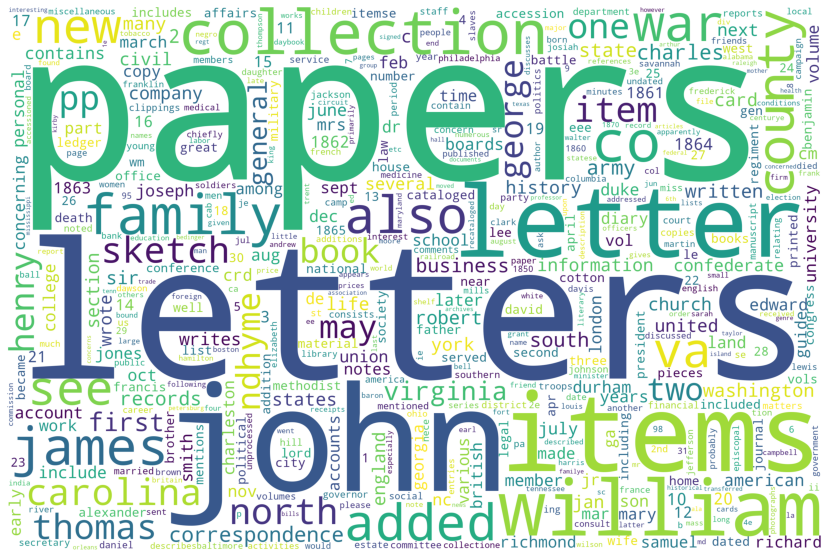

In [5]:
# Let's plot wordcloud based on frequency of word occurence

# function to change the plot to black & white
def black_color_func(word, font_size, position,orientation,random_state=None, **kwargs):
    return("hsl(0,100%, 1%)")

wordcloud = WordCloud(stopwords=stop_words,background_color="white", width=3000, height=2000, max_words=500,collocations=True).generate_from_frequencies(Counter)

# change it to black&white optional
# wordcloud.recolor(color_func = black_color_func)
plt.figure(figsize=(20,10))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

This wordcloud shows the major categories of the text like papers, books, accounts, collection and letters. But let's remove these common categorical words to better understand the most frequent topics.

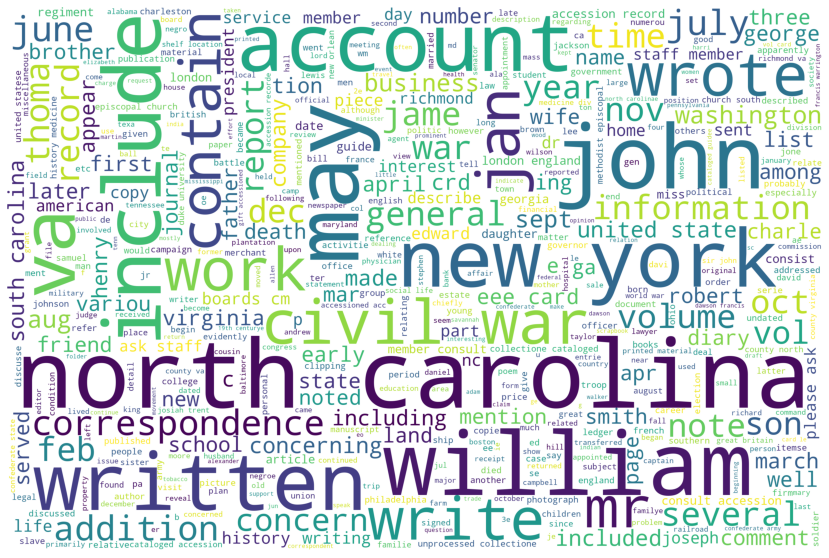

In [6]:
# Add the words to the stop words list
stop_words.extend(["papers","letters",
"items","letter","collection","family","co","also","added","see","sketch","one","two","ten", "pp","book","section","ndhyme","many","item","next"])
wordcloud = WordCloud(stopwords=stop_words,background_color="white", width=3000, height=2000, max_words=500,collocations=True).generate(filtered_sentence)
# wordcloud.recolor(color_func = black_color_func)
plt.figure( figsize=(20,10))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

We have better plot, but let's add months to the stop word list

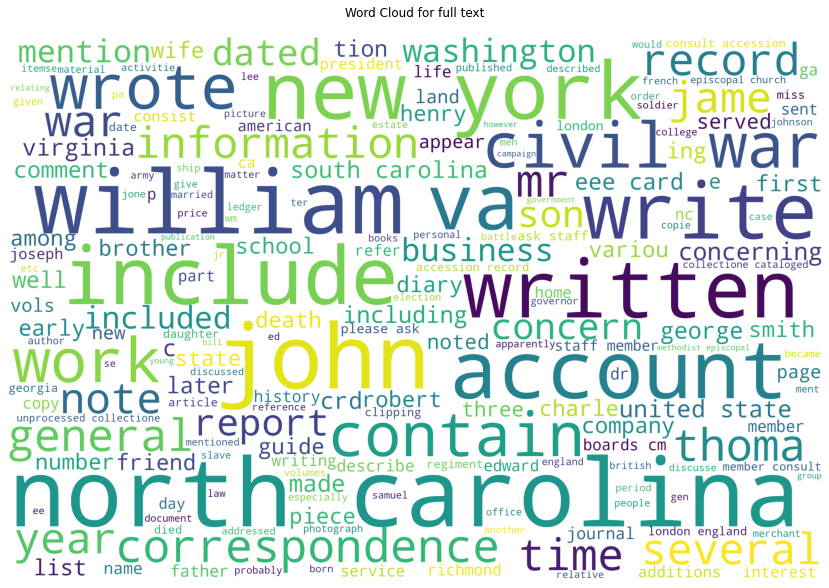

In [7]:
stop_words.extend(['dec', 'jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov',
"december","january","febraury","march","april","may","june","july","august","september","october","november","vol","volume","addition","sept"])
wordcloud = WordCloud(stopwords=stop_words,background_color="white", width=3000, height=2000, max_words=200,collocations=True,prefer_horizontal=1).generate(filtered_sentence)
plt.figure( figsize=(20,10))
plt.title("Word Cloud for full text",pad=20)
plt.imshow(wordcloud)
plt.axis("off")
plt.show()


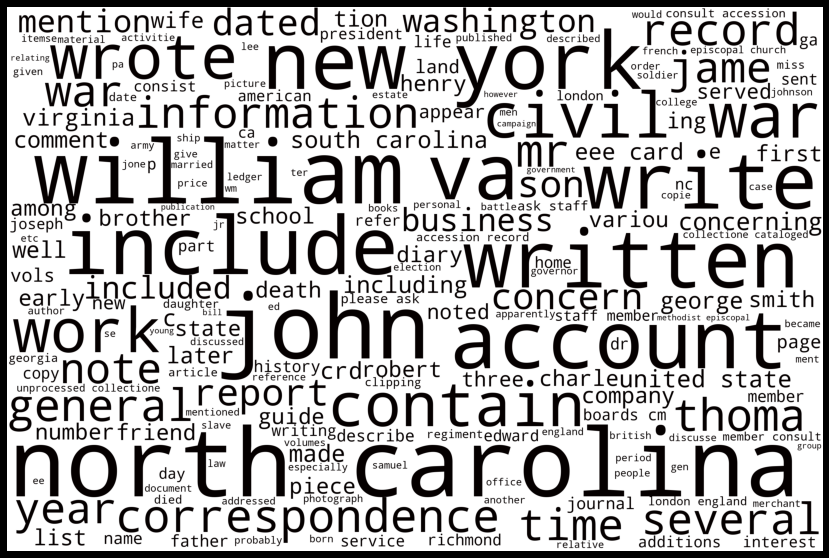

In [8]:
#Change the above plot to black and white
wordcloud.recolor(color_func = black_color_func)
plt.figure( figsize=(20,10), facecolor='k')
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

According to the plot, we have recurring themes such as the civil war, family relationships(father, brother, daughter, wife), business, history, work, company,army, photograph and war diary. Common places are North Carolina, South Carolina Virginia, Washington.

In [9]:
df = pd.read_csv("all_sorted_collection.csv")
df = df.iloc[:,[0,1,2,3,5,6]]
# Create a year column for main entries
main_entries =  df[df["Collection_Head"]==1]
ind_main_entries = df[df["Collection_Head"]==1].index

# Start and End date column
start,end=[],[]
for i in ind_main_entries:
    year = df.Year[i]
    if type(year) == float and pd.isna(year):
        start.append(np.nan)
        end.append(np.nan)
        continue
    if(re.match(first,year)):
        start.append(int(year.split("-")[0]))
        if(len(year.split("-")[1])==2):
            end.append(int(year.split("-")[0][:2]+ year.split("-")[1]))   
        else:
            end.append(int(year.split("-")[1]))     
    elif(re.match(second,year)):
        # print("Second",year)
        lt =re.findall("1\d{3}",year)
        if(len(lt)==2):
            start.append(int(lt[0]))
            end.append(int(lt[1]))
        else:
            start.append(np.nan)
            end.append(np.nan)
    elif(re.match(third,year)):
        # print("Third",year)
        start.append(int(year))
        end.append(np.nan)
    else:
        start.append(np.nan)
        end.append(np.nan)        
df.loc[ind_main_entries, "Start"]  = start
df.loc[ind_main_entries, "End"]  = end
ind = df[df.Year.isnull()].index
df.loc[ind,["Start","End"]] =np.nan
df.Start = df.Start.apply(pd.to_numeric)
df.End = df.End.apply(pd.to_numeric)
# remove 
df_year = df[((df.End>=1512))|((df.Start<1512 )& (df.End<1512))]

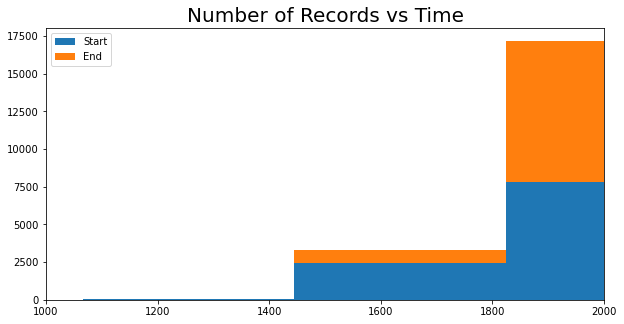

In [10]:
plt.figure(figsize=(10,5))
plt.hist([df_year.Start,df_year.End], label=["Start Date","End Date"],stacked=True)
plt.xlim([1000,2000])
plt.title("Number of Records vs Time",fontsize=20)
plt.legend(["Start","End"]);

In [11]:
stop_words = stopwords.words('english')
stop_words.extend(["papers","letters","items","itemse","boards","cm",
"items","letter","collection","family","co","also","added","see","sketch","one","two","ten", "crd","pp","book","section","ndhyme","many","item","next","vols","account","guide"])
stop_words.extend(['dec', 'jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov',
"december","january","febraury","march","april","may","june","july","august","september","october","november","vol","volume","addition","sept"])

def clean(full):
    # remove punctuation
    full_no_punc = re.sub(r"\.|!", "",full)
    # print(full_no_punc)
    full_no_punc = " ".join([i for i in full_no_punc.split() if len(i)>1])
    # print(full_no_punc)

    # Tokenize
    text_tokens = word_tokenize(full_no_punc)
    # print(text_tokens)

    # # Change to lower case and select only alphanumeric
    pre_process = [i.lower() for i in text_tokens if i.isalpha()]
    # print(pre_process)

    # Remove Stop Words,# remove_single_characters
    token_no_stopword = [word for word in pre_process if word not in stop_words]
    # print(token_no_stopword)
# 

    filtered_sentence = (" ").join(token_no_stopword)
    return filtered_sentence

clean("itemse")

''

In [12]:
df_set_year = df_year.groupby(["Start"])["Text"].apply(" ".join).reset_index()
df_set_year["Clean"] = df_set_year["Text"].apply(clean)
df_set_year.head()

Start  \
0  1066.0   
1  1325.0   
2  1336.0   
3  1350.0   
4  1362.0   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          Text  \
0                                                                                                                                                                                                                                                                                                                                                                                                                                                                      Beckwith-Morton Genealogy 1066-1881  FOR INFORMATION ABOUT THIS COLLECTION OR ADDITIONS TO THIS COLLECTION, PLEASE ASK A STAFF MEMBER TO CONSULT THE ACCESSION RECORDS.   
1                                                                                                                                                                 Gower, John (ca. 1325-1408)  London, England  : Cambridge Univ. Library. Add. 3035 Mirour de 1'Omme  1 reel  Filmed by Cambridge University Library, Cambridge, England cJohn Hurt Fisher,  (Over) John Gower, Moral hilosopher and Friend of Chaucer (N. Y= 1964), . Gower, John (ca. 1325-1408)  Sutherland Ms. (Trentham Hall). French Ballads  London, England  Section A 5 pages(Photostatg  See the  of this manuscript.  Date of order: 10-1-59 Date received: Nov. S   
2                                                                                                                                                                                                                                                                                                                                                                                                                   Wise, tienry Alexander Papers, 1336-1894 Richmond, Virginia  section aA  LU-7=36  10 items 1 item added,  11-8-5  l item from Misc. file,  3-77-52  l item added, 1 item added, 1 item added,     6-31-57 10-17-58 12-14-5   
3  e Room 201,  Station 113 OCSI:3 siveniel °° Earl Je (Earl Jefferson ), Papers, 1350-1995 and nede (bulk 1700-1980 )e 32,625 itemse History professor at Duke University, Northwestern, and the University of Chicagoe Includes source material and background notes to Hamilton's major academic works; also some 260 original  legajos, cedulas, and other documents in French and Spanish pertaining to Spanish trade and economic development and French finance, hundreds of photostat niv®@ ies of documents held  o del Banco de Espanay  by the Archiv istorico Nacional, and  the Archivo H  22 JAN 98 38247745 NDHYme SEE NEXT CRD   
4                                                                                                                                                                                                                                                                                                                                                                                      Brent, George william  Papers, 1362-1681  Augusta, Richmond v-o., Ga. & Montgomery, Montgomery Co., Ala.  Section &A 70 items 9 items added, 7-11-41 5-2-41 49 items added, 12-15-49 l item aaded, 3-1-50 3 items added, 8-22-50 2 items added, 5-10-57   

                                                                                                                                                                        

# Common words by Years

## <1400

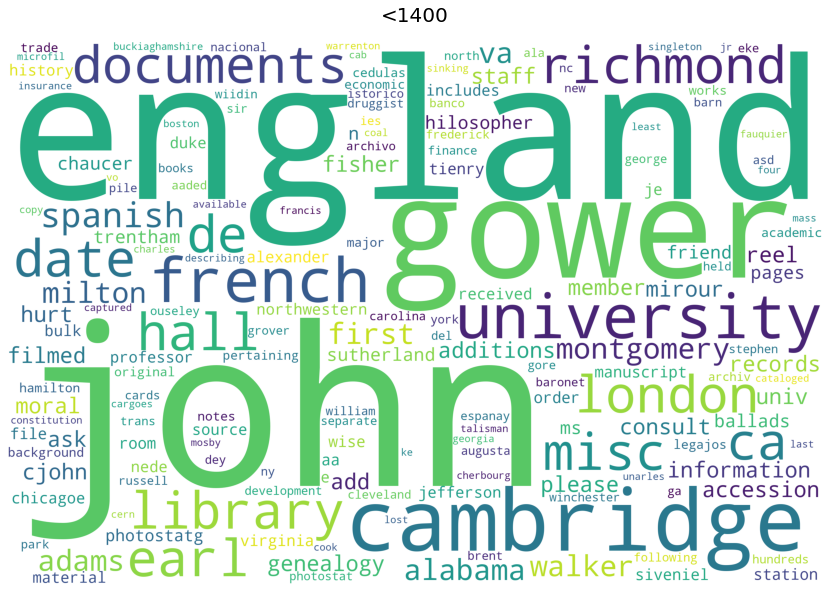

In [13]:

# Let's plot wordcloud based on frequency of word occurence
condition = df_set_year.Start<1400
string = " ".join(df_set_year[condition].Clean.tolist())

df_set_year[df_set_year.Start<1400]
# function to change the plot to black & white
def black_color_func(word, font_size, position,orientation,random_state=None, **kwargs):
    return("hsl(0,100%, 1%)")

wordcloud = WordCloud(stopwords=stop_words,background_color="white", width=3000, height=2000, max_words=500,collocations=True,prefer_horizontal=1).generate(string)

# change it to black&white optional
# wordcloud.recolor(color_func = black_color_func)
plt.figure(figsize=(20,10))
plt.title("<1400",fontsize=20,pad=20)
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

1400-1700

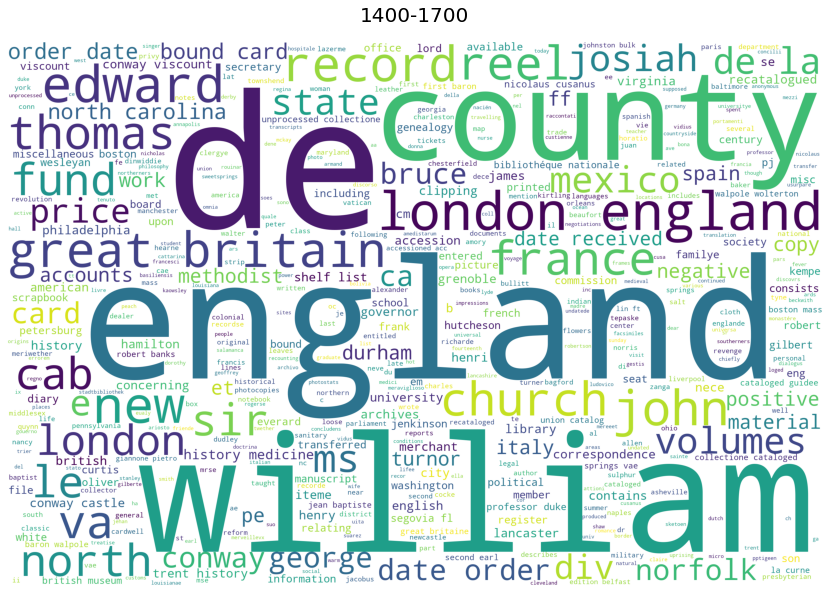

In [14]:

# Let's plot wordcloud based on frequency of word occurence
condition =(df_set_year.Start>=1400) & (df_set_year.Start<=1700)
string = " ".join(df_set_year[condition].Clean.tolist())

# function to change the plot to black & white
def black_color_func(word, font_size, position,orientation,random_state=None, **kwargs):
    return("hsl(0,100%, 1%)")

wordcloud = WordCloud(stopwords=stop_words,background_color="white", width=3000, height=2000, max_words=500,collocations=True,prefer_horizontal=1).generate(string)

# change it to black&white optional
# wordcloud.recolor(color_func = black_color_func)
plt.figure(figsize=(20,10))
plt.title("1400-1700",fontsize=20,pad=20)
plt.imshow(wordcloud)

plt.axis("off")
plt.show()

1700-1800

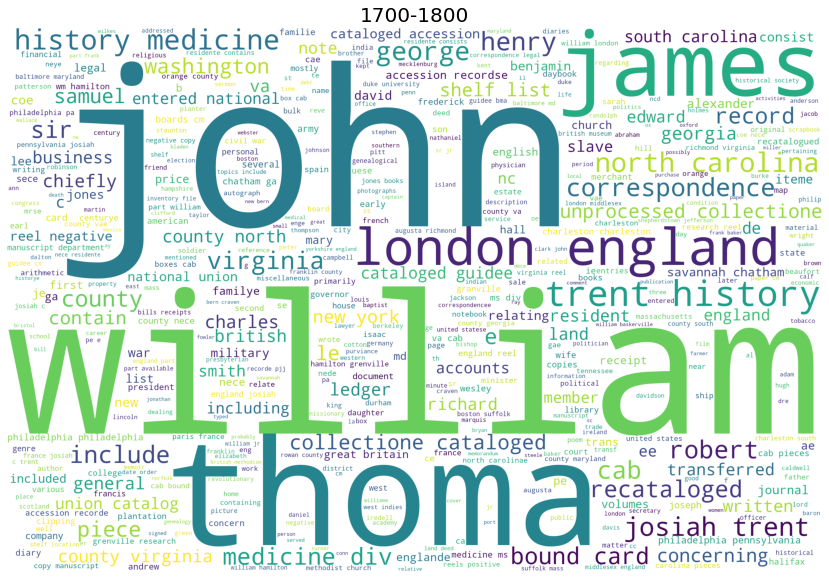

In [15]:

# Let's plot wordcloud based on frequency of word occurence
condition =(df_set_year.Start>=1700) & (df_set_year.Start<=1800)
string = " ".join(df_set_year[condition].Clean.tolist())

df_set_year[df_set_year.Start<1400]
# function to change the plot to black & white
def black_color_func(word, font_size, position,orientation,random_state=None, **kwargs):
    return("hsl(0,100%, 1%)")

wordcloud = WordCloud(stopwords=stop_words,background_color="white", width=3000, height=2000, max_words=500,collocations=True,prefer_horizontal=1).generate(string)

# change it to black&white optional
# wordcloud.recolor(color_func = black_color_func)
plt.figure(figsize=(20,10))
plt.imshow(wordcloud)
plt.title("1700-1800",fontsize=20)
plt.axis("off")
plt.show()

1800-1900

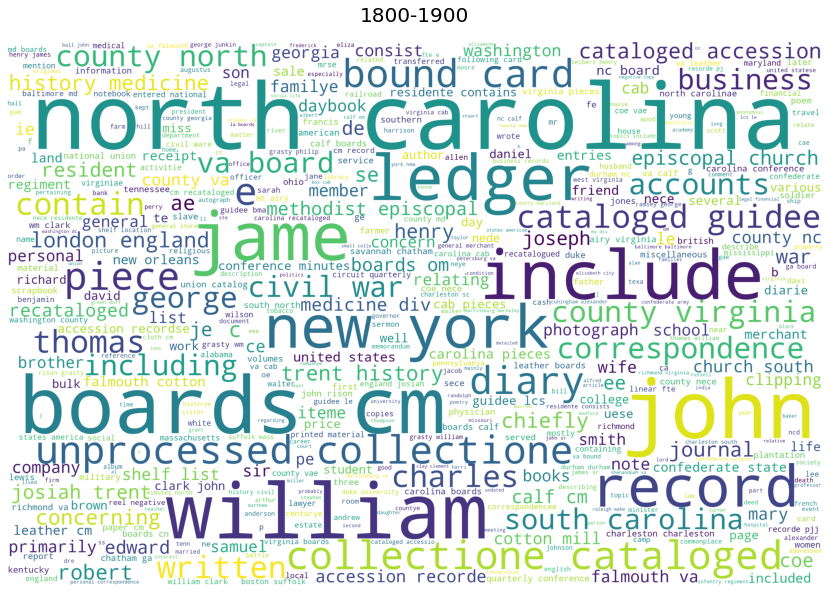

In [16]:

# Let's plot wordcloud based on frequency of word occurence
condition =(df_set_year.Start>=1800) & (df_set_year.Start<=1900)
string = " ".join(df_set_year[condition].Clean.tolist())

df_set_year[df_set_year.Start<1400]
# function to change the plot to black & white
def black_color_func(word, font_size, position,orientation,random_state=None, **kwargs):
    return("hsl(0,100%, 1%)")

wordcloud = WordCloud(stopwords=stop_words,background_color="white", width=3000, height=2000, max_words=500,collocations=True,prefer_horizontal=1).generate(string)

# change it to black&white optional
# wordcloud.recolor(color_func = black_color_func)
plt.figure(figsize=(20,10))
plt.title("1800-1900",fontsize=20,pad=20)
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

# Common words by author's gender


In [17]:
# Collect first names from dataset
df = pd.read_csv("all_sorted_collection.csv")

first_names = []
indices = []
for index, row in df.iterrows():
    if row['Coll_head'] == 1:
        # if name contains a comma, it's likely a name and not an organization
        if ", " in str(row['Name']):
            name = str(row['Name'].split(" ")[1])
            # Find first name after Sir or Mrs.
            if ("Sir" in name or "Mrs" in name or "Dr." in name or "Capt" in name or "Miss" in name or "Lord" in name or "Doctor" in name) and len(row['Name'].split(" ")) > 2:
                name = str(row['Name'].split(" ")[2])
            # For initials, try to find whole name
            if len(name) < 2 and len(row['Name'].split(" ")) > 2 and len(str(row['Name'].split(" ")[2])) > 2:
                name = str(row['Name'].split(" ")[2])
            if not "Archive" in name and not "Army" in name and not "University" in name and not "Family" in name and not "Ministry" in name and not "CHURCH" in name.upper():
                name = name.strip(" \r\n,().")
                if not "." in name and len(name) > 3:
                    first_names.append(name)
                    indices.append(index)

In [18]:
fem_ind = [12, 29, 41, 43, 59, 63, 64, 75, 81, 82, 84, 85, 92, 93, 125, 145, 146, 161, 186, 195, 196, 197, 198, 199, 200, 210, 216, 255, 264, 296, 302, 303, 304, 347, 348, 386, 387, 407, 422, 423, 452, 469, 470, 471, 475, 533, 535, 536, 541, 542, 543, 564, 572, 587, 588, 589, 590, 591, 593, 594, 613, 614, 642, 643, 651, 658, 666, 672, 674, 686, 698, 724, 736, 738, 739, 771, 772, 782, 783, 797, 817, 822, 827, 828, 855, 860, 865, 868, 874, 875, 911, 916, 933, 946, 950, 955, 960, 979, 993, 994, 1013, 1058, 1071, 1104, 1105, 1106, 1108, 1115, 1121, 1126, 1127, 1145, 1146, 1149, 1184, 1212, 1232, 1258, 1268, 1270, 1306, 1309, 1319, 1339, 1384, 1389, 1390, 1393, 1409, 1411, 1413, 1421, 1422, 1430, 1431, 1432, 1444, 1445, 1446, 1447, 1449, 1465, 1466, 1467, 1480, 1488, 1519, 1527, 1528, 1530, 1537, 1538, 1550, 1555, 1592, 1603, 1608, 1618, 1619, 1622, 1659, 1660, 1669, 1676, 1682, 1688, 1712, 1713, 1729, 1730, 1731, 1732, 1733, 1734, 1735, 1736, 1746, 1750, 1753, 1775, 1799, 1800, 1815, 1818, 1850, 1860, 1862, 1867, 1868, 1869, 1870, 2012, 2013, 2014, 2019, 2027, 2029, 2066, 2067, 2084, 2085, 2130, 2132, 2137, 2151, 2168, 2173, 2176, 2177, 2181, 2190, 2198, 2199, 2202, 2226, 2234, 2247, 2256, 2258, 2259, 2262, 2287, 2297, 2317, 2320, 2322, 2330, 2335, 2343, 2350, 2352, 2353, 2370, 2371, 2373, 2394, 2399, 2409, 2426, 2473, 2477, 2478, 2488, 2489, 2494, 2504, 2506, 2508, 2509, 2511, 2513, 2525, 2531, 2532, 2553, 2559, 2560, 2561, 2562, 2588, 2589, 2590, 2610, 2611, 2612, 2613, 2614, 2615, 2617, 2618, 2625, 2659, 2660, 2661, 2701, 2702, 2713, 2770, 2771, 2779, 2803, 2804, 2808, 2809, 2828, 2830, 2833, 2834, 2840, 2861, 2862, 2868, 2965, 2996, 3000, 3019, 3049, 3051, 3052, 3060, 3143, 3149, 3152, 3173, 3182, 3183, 3185, 3194, 3195, 3198, 3200, 3201, 3202, 3217, 3240, 3246, 3249, 3260, 3277, 3282, 3285, 3296, 3317, 3321, 3331, 3332, 3342, 3343, 3344, 3348, 3353, 3354, 3364, 3388, 3403, 3414, 3417, 3419, 3420, 3438, 3462, 3463, 3469, 3470, 3487, 3502, 3520, 3536, 3537, 3548, 3549, 3557, 3574, 3575, 3580, 3663, 3717, 3739, 3740, 3744, 3747, 3749, 3751, 3762, 3775, 3782, 3791, 3802, 3804, 3806, 3808, 3824, 3825, 3828, 3846, 3866, 3873, 3893, 3894, 4068, 4083, 4116, 4117, 4285, 4290, 4294, 4300, 4321, 4327, 4330, 4335, 4336, 4337, 4344, 4348, 4349, 4350, 4354, 4376, 4400, 4410, 4428, 4432, 4463, 4471, 4520, 4568, 4582, 4590, 4592, 4593, 4600, 4603, 4623, 4624, 4625, 4714, 4717, 4723, 4729, 4734, 4756, 4799, 4800, 4804, 4822, 4833, 4834, 4880, 4882, 4957, 4966, 4987, 4991, 5009, 5010, 5011, 5016, 5027, 5039, 5055, 5061, 5062, 5067, 5068, 5069, 5134, 5151, 5152, 5199, 5201, 5220, 5221, 5228, 5229, 5253, 5267, 5283, 5284, 5285, 5293, 5295, 5298, 5325, 5331, 5341, 5397, 5444, 5457, 5478, 5483, 5514, 5527, 5528, 5529, 5543, 5544, 5554, 5555, 5556, 5557, 5560, 5570, 5571, 5617, 5648, 5649, 5663, 5664, 5668, 5753, 5757, 5758, 5828, 5841, 5842, 5848, 5858, 5877, 5881, 5882, 5907, 5908, 5909, 5918, 5919, 5925, 5926, 5927, 5929, 5946, 6007, 6020, 6025, 6026, 6033, 6063, 6064, 6099, 6107, 6110, 6139, 6152, 6153, 6154, 6155, 6156, 6157, 6158, 6159, 6160, 6161, 6162, 6163, 6192, 6194, 6208, 6209, 6215, 6234, 6235, 6239, 6255, 6266, 6268, 6280, 6281, 6282, 6284, 6303, 6307, 6309, 6335, 6341, 6344, 6370, 6405, 6410, 6423, 6429, 6441, 6445, 6474, 6476, 6515, 6516, 6533, 6538, 6541, 6552, 6557, 6558, 6564, 6567, 6579, 6588, 6600, 6608, 6609, 6624, 6636, 6638, 6642, 6647, 6658, 6669, 6672, 6673, 6678, 6679, 6680, 6681, 6688, 6689, 6724, 6732, 6751, 6753, 6759, 6760, 6761, 6762, 6763, 6764, 6765, 6766, 6767, 6768, 6769, 6770, 6771, 6772, 6773, 6774, 6775, 6776, 6777, 6778, 6779, 6780, 6781, 6782, 6783, 6786, 6795, 6796, 6809, 6867, 6878, 6912, 6918, 6924, 6935, 6936, 6938, 6940, 6944, 6957, 6962, 6989, 7003, 7008, 7009, 7010, 7012, 7019, 7020, 7024, 7025, 7026, 7027, 7039, 7051, 7076, 7085, 7095, 7099, 7100, 7108, 7113, 7147, 7153, 7156, 7188, 7207, 7217, 7218, 7227, 7231, 7232, 7233, 7242, 7249, 7259, 7260, 7266, 7277, 7303, 7324, 7340, 7350, 7376, 7389, 7390, 7392, 7426, 7429, 7430, 7432, 7446, 7447, 7451, 7456, 7474, 7496, 7509, 7510, 7512, 7535, 7541, 7554, 7555, 7556, 7557, 7567, 7568, 7585, 7586, 7598, 7603, 7605, 7613, 7614, 7615, 7616, 7634, 7663, 7678, 7731, 7739, 7741, 7755, 7765, 7772, 7797, 7804, 7814, 7822, 7827, 7850, 7852, 7866, 7877, 7887, 7890, 7891, 7892, 7893, 7898, 7901, 7912, 7922, 7925, 7926, 7938, 7951, 7952, 7953, 7955, 7956, 7957, 7970, 7980, 7991, 7992, 7997, 8001, 8016, 8036, 8040, 8042, 8046, 8052, 8055, 8062, 8079, 8088, 8118, 8125, 8131, 8143, 8163, 8174, 8179, 8180, 8189, 8203, 8219, 8238, 8239, 8243, 8246, 8255, 8273, 8284, 8285, 8286, 8300, 8315, 8316, 8328, 8329, 8336, 8337, 8338, 8343, 8344, 8348, 8349, 8361, 8362, 8408, 8410, 8429, 8434, 8441, 8497, 8501, 8507, 8540, 8572, 8606, 8609, 8630, 8631, 8639, 8660, 8662, 8663, 8665, 8666, 8677, 8678, 8679, 8680, 8689, 8690, 8702, 8703, 8707, 8711, 8730, 8732, 8743, 8751, 8763, 8783, 8789, 8795, 8808, 8814, 8838, 8846, 8929, 8945, 8987, 8998, 9030, 9035, 9036, 9064, 9072, 9073, 9074, 9075, 9084, 9085, 9086, 9087, 9088, 9099, 9124, 9172, 9178, 9179, 9228, 9236, 9237, 9266, 9267, 9268, 9287, 9297, 9313, 9314, 9324, 9365, 9372, 9377, 9378, 9379, 9380, 9397, 9488, 9489, 9501, 9502, 9504, 9506, 9550, 9551, 9552, 9559, 9567, 9604, 9605, 9607, 9668, 9670, 9687, 9694, 9748, 9805, 9806, 9808, 9810, 9821, 9831, 9851, 9856, 9875, 9880, 9881, 9899, 9902, 9906, 9921, 9928, 9936, 9937, 9949, 9990, 9991, 9992, 10009, 10021, 10022, 10035, 10036, 10037, 10038, 10094, 10115, 10128, 10131, 10141, 10151, 10153, 10154, 10168, 10169, 10244, 10245, 10251, 10264, 10288, 10289, 10292, 10356, 10359, 10390, 10401, 10407, 10414, 10424, 10426, 10427, 10437, 10441, 10443, 10444, 10483, 10484, 10485, 10501, 10502, 10505, 10512, 10521, 10557, 10559, 10560, 10562, 10564, 10565, 10593, 10599, 10638, 10639, 10652, 10653, 10666, 10686, 10693, 10706, 10707, 10719, 10720, 10754, 10755, 10756, 10792, 10794, 10814, 10816, 10829, 10833, 10859, 10870, 10886, 10892, 10895, 10903, 10916, 10918, 10936, 10968, 10970, 10971, 10975, 11006, 11007, 11009, 11019, 11020, 11058, 11059, 11078, 11105, 11113, 11120, 11122, 11123, 11128, 11138, 11153, 11154, 11180, 11181, 11183, 11189, 11190, 11191, 11192, 11193, 11194, 11195, 11196, 11197, 11198, 11199, 11200, 11201, 11202, 11203, 11204, 11205, 11206, 11207, 11208, 11209, 11210, 11211, 11212, 11213, 11224, 11265, 11294, 11297, 11301, 11303, 11304, 11305, 11306, 11325, 11333, 11337, 11340, 11346, 11347, 11357, 11365, 11366, 11381, 11565, 11589, 11595, 11611, 11613, 11615, 11656]

In [19]:
male_indices = [i for i in range(len(indices)) if i not in fem_ind]

In [20]:
# Collect first names from dataset
df = pd.read_csv("all_sorted_collection.csv")

first_names = []
indices = []
for index, row in df.iterrows():
    if row['Coll_head'] == 1:
        # if name contains a comma, it's likely a name and not an organization
        if ", " in str(row['Name']):
            name = str(row['Name'].split(" ")[1])
            # Find first name after Sir or Mrs.
            if ("Sir" in name or "Mrs" in name or "Dr." in name or "Capt" in name or "Miss" in name or "Lord" in name or "Doctor" in name) and len(row['Name'].split(" ")) > 2:
                name = str(row['Name'].split(" ")[2])
            # For initials, try to find whole name
            if len(name) < 2 and len(row['Name'].split(" ")) > 2 and len(str(row['Name'].split(" ")[2])) > 2:
                name = str(row['Name'].split(" ")[2])
            if not "Archive" in name and not "Army" in name and not "University" in name and not "Family" in name and not "Ministry" in name and not "CHURCH" in name.upper():
                name = name.strip(" \r\n,().")
                if not "." in name and len(name) > 3:
                    first_names.append(name)
                    indices.append(index)

In [21]:
df_gender = df.loc[indices]
df_gender = df_gender[~df_gender.Text.isnull()]
df_gender["Clean"] = df_gender["Text"].apply(clean)
male_indices = [i for i in male_indices if i in df_gender.index]
fem_ind = [i for i in fem_ind if i in df_gender.index]

### All male authors

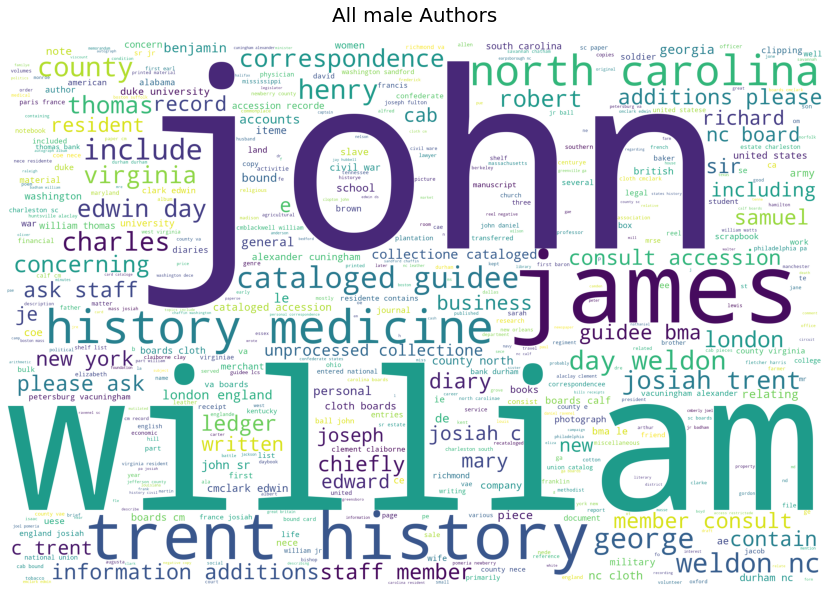

In [22]:
st = "".join(df_gender.loc[male_indices,"Clean"].to_list())
wordcloud = WordCloud(stopwords=stop_words,background_color="white", width=3000, height=2000, max_words=500,collocations=True,prefer_horizontal=1).generate(st)
# change it to black&white optional
# wordcloud.recolor(color_func = black_color_func)
plt.figure(figsize=(20,10))
plt.title("All male Authors",fontsize=20,pad=20)
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

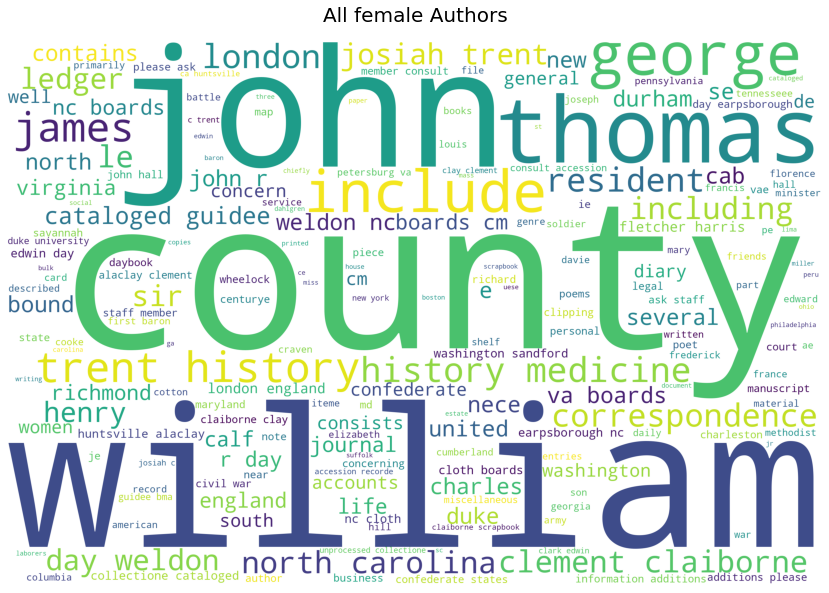

In [25]:
st = "".join(df_gender.loc[fem_ind,"Clean"].to_list())

wordcloud = WordCloud(stopwords=stop_words,background_color="white", width=3000, height=2000, max_words=200,collocations=True,prefer_horizontal=1).generate(st)

# change it to black&white optional
# wordcloud.recolor(color_func = black_color_func)
plt.figure(figsize=(20,10))
plt.imshow(wordcloud)
plt.axis("off")
plt.title("All female Authors",fontsize=20,pad=20)
plt.show()
